# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [3]:
#印出iris的key值與檔案位置
print('#印出iris的key值與檔案位置')
print(iris.keys())
print(iris['filename'])

#查看前10筆資料
print('#查看前10筆資料')
print(iris.data[0:10])

#查看資料型別
print('#查看資料型別')
print(type(iris.data))


#印出標註的樣本類別資料
print('#印出標註的樣本類別資料')
print(iris.target_names)

#印出iris的key值與檔案位置
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
#查看前10筆資料
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
#查看資料型別
<class 'numpy.ndarray'>
#印出標註的樣本類別資料
['setosa' 'versicolor' 'virginica']


In [4]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [5]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
print("target_names:" + str(iris['target_names']))

target_names:['setosa' 'versicolor' 'virginica']


In [7]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'] ,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [8]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
print('#合併資料特徵欄位')
print(iris_data.head(10))


iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
print('#目標欄位')
print(iris_data.head(10))

#合併資料特徵欄位
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  


In [9]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data['target'].isin([0,1])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data['target'],test_size=0.2)

In [11]:
print('#head')
print(X_train.head())

print('#shape')
print(X_train.shape)

#head
    sepal length (cm)  petal length (cm)
31                5.4                1.5
83                6.0                5.1
48                5.3                1.5
14                5.8                1.2
73                6.1                4.7
#shape
(80, 2)


In [12]:
print('#head')
print(X_test.head())

print('#shape')
print(X_test.shape)

#head
    sepal length (cm)  petal length (cm)
29                4.7                1.6
30                4.8                1.6
23                5.1                1.7
7                 5.0                1.5
64                5.6                3.6
#shape
(20, 2)


In [13]:
print('#head')
print(Y_train.head())

print('#shape')
print(Y_train.shape)

#head
31    0
83    1
48    0
14    0
73    1
Name: target, dtype: int32
#shape
(80,)


In [14]:
print('#head')
print(Y_test.head())

print('#shape')
print(Y_test.shape)

#head
29    0
30    0
23    0
7     0
64    1
Name: target, dtype: int32
#shape
(20,)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (Standardizationscore)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [1]:
from IPython.display import Math

Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [2]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [17]:
def norm_stats(dfs):
    minimum = np.min(dfs,axis=0)
    maximum = np.max(dfs,axis=0)
    mu = np.mean(dfs,axis=0)
    sigma = np.std(dfs,axis=0)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [18]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train

array([[-0.16995166, -0.93571559],
       [ 0.74664154,  1.50086751],
       [-0.32271719, -0.93571559],
       [ 0.44111048, -1.13876419],
       [ 0.89940707,  1.23013605],
       [ 0.89940707,  1.16245319],
       [ 2.12153133,  1.36550178],
       [-0.62824825, -0.86803273],
       [-0.01718612,  0.75635601],
       [-1.54484145, -1.07108132],
       [ 0.28834494,  0.82403887],
       [-0.01718612,  0.75635601],
       [ 1.05217261,  0.9594046 ],
       [-0.62824825,  0.07952737],
       [-0.47548272, -0.93571559],
       [-1.69760698, -1.07108132],
       [ 0.44111048,  0.82403887],
       [ 1.9687658 ,  1.29781892],
       [ 1.35770367,  0.9594046 ],
       [-0.62824825, -0.93571559],
       [-1.08654485, -1.00339846],
       [-0.01718612,  0.55330741],
       [-0.93377932, -1.00339846],
       [ 1.20493814,  1.36550178],
       [-1.08654485, -1.00339846],
       [ 0.28834494,  0.89172173],
       [-0.16995166,  1.09477033],
       [-1.69760698, -1.00339846],
       [ 0.13557941,

## use sklearn

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.51125 2.8825 ]
[0.65459792 1.47747885]


In [20]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.16995166, -0.93571559],
       [ 0.74664154,  1.50086751],
       [-0.32271719, -0.93571559],
       [ 0.44111048, -1.13876419],
       [ 0.89940707,  1.23013605]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [21]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-1.23931038 -0.86803273]
 [-1.08654485 -0.86803273]
 [-0.62824825 -0.80034987]
 [-0.78101379 -0.93571559]
 [ 0.13557941  0.48562455]
 [-0.78101379  0.41794169]
 [-0.78101379 -1.00339846]
 [ 0.74664154  0.75635601]
 [-1.23931038 -1.07108132]
 [ 0.28834494  0.89172173]]


you can also use fit_transform method (i.e., fit and then transform)    

In [22]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-1.12904899 -0.91201121]
 [-0.94395899 -0.91201121]
 [-0.388689   -0.83439323]
 [-0.573779   -0.98962918]
 [ 0.536761    0.64034829]
 [-0.573779    0.56273032]
 [-0.573779   -1.06724716]
 [ 1.27712099  0.95082019]
 [-1.12904899 -1.14486513]
 [ 0.721851    1.10605614]]


In [23]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.05530959220014
29.612030950161703


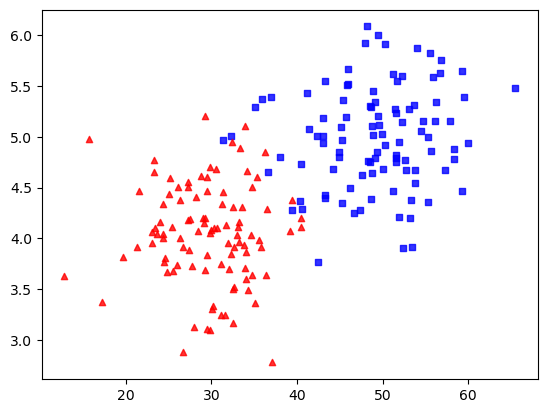

In [24]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [25]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [26]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [27]:
minmax_norm(x_val[:10])

array([0.92304737, 0.4919294 , 0.54584518, 0.        , 1.        ,
       0.21267832, 0.83569424, 0.45619206, 0.84860251, 0.70828222])

In [28]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[65.50974374]
[[0.69692574]
 [0.61559578]
 [0.62576693]
 [0.52279379]
 [0.71144278]
 [0.56291534]
 [0.68044666]
 [0.60885396]
 [0.6828818 ]
 [0.65641052]]
